# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

Общая формула для обновления весов выглядит следующим образом:

$$ w_{new} = w_{old} - \alpha * \bigtriangledown_{w} Q(w_{old})  $$

Сам функционал качества с L2-регуляризацией для батча размером n выглядит так:

$$ Q(w) = \frac{1}{n}\sum\limits_{i=1}^n L(w) + \frac{1}{c}\sum\limits_{i=1}^d w_i^2 $$

И Loss-функцию для линейной регрессии для одного объекта в батче запишем так:

$$ L(w) = (y_i - a_i)^2 $$

Тогда

$$ \bigtriangledown Q(w) = \frac{2}{n} \sum\limits_{i=1}^n (\langle\,x_i,w\rangle - y_i) x_i + \frac{2}{c}w  $$

Можно вынести константу и учитывать её при выборе $ \alpha $(но для формальной верности соотношений оставим ее в конечной формуле):

$$ \bigtriangledown Q(w) = \frac{1}{n} \sum\limits_{i=1}^n (\langle\,x_i,w\rangle - y_i) x_i + \frac{1}{c}w  $$

Тогда итоговая формула будет выглядеть так:

$$ w_{new} = w_{old} - \alpha (\frac{2}{n} \sum\limits_{i=1}^n (a_i - y_i) x_i + \frac{2}{c}w_{old}),  $$
где $ a_i = \langle\,x_i,w\rangle. $

Интуитивно градиент можно понимать так: если предсказание с использованием данной точки w получилось плохим, то нужно уйти от этой точки подальше(в сторону улучшения предсказания), и чем хуже получилось предсказание, тем сильнее надо сместиться от этого положения(это можно заключить из наличия множителя $a_i - y_i$). 

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

Loss-функцию для логистической регрессии для одного объекта в батче запишем так:

$$ L(w) = -(y_i loga_i - (1 - y_i) log(1 - a_i)) $$

В качестве логарифма возьмем натуральный логарифм(из тех же соотношений, что и выше), воспользуемся правилами взятия градиента от функций, раскроем скобки, сократим члены и получим следующую формулу для логистической регрессии:

$$ \bigtriangledown_{w} Q = \frac{1}{n} \sum\limits_{i=1}^n (a_i - y_i) x_i + \frac{2}{c} w $$

Для вычислений использовалась следующая формула: $\sigma'(x) = (1 - \sigma(x)) \sigma(x) $, которая легко выводится из определения.

Тогда, итоговая формула обновления весов для логистической регрессии такая:

$$ w_{new} = w_{old} - \alpha (\frac{1}{n} \sum\limits_{i=1}^n (a_i - y_i) x_i + \frac{2}{c} w_{old}),  $$
где $ a_i = \frac{1}{1 + e^{-\langle\,x_i,w\rangle}}. $

Можно заметить, что формула для логистической и линейной регрессии выглядит одинаково, различия проявляются только в алгоритме предсказания $a_i$. В данной случае интуитивная интерпретация градиента похожа на предыдущий случай, только здесь смысл в том, что чем хуже соотносится предсказанная нами вероятность отношения объекта к положительному классу и действительный класс объекта, тем больше мы должны поменять своё решение(больше сместиться от данной точки весов). 

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

На лекции был получен следующий результат:

$$ \bigtriangledown_{w} Q(w) = 2 X^T X w - 2 X^T y $$

Возьмем второй градиент и рассмотрим гессиан:
$$ \bigtriangledown_{w}^2 Q(w) = \bigtriangledown_{w} (2 X^T X w - 2 X^T y) = 2 X X^T $$

Если расписать покомпонентно, то легко увидеть, что в матрице X X^T на главной диагонали стоят суммы квадратов признаков для объектов. С учетом условия можно воспользоваться критерием Сильвестра положительной определенности матрицы: все диагональные элементы положительны, - и заключить, что матрица $2 X X^T$ положительна определена, это является достаточным условием того, что решение является точкой минимума. 

Добавим в формулу для $\bigtriangledown_{w} Q(w)$ вектор регуляризации. Для каждого объекта добавляется сумма квадратов весов, поэтому решение формула будет следующей:

$$ Q(w) = \frac{1}{n}||X w - y || + \frac{1}{c}[\sum\limits_{i=1}^n w_i^2, ..., \sum\limits_{i=1}^n w_i^2]^T $$

Ищем точку минимума:

$$ \bigtriangledown_{w} Q(w) = 2 X^T X w - 2 X^T y + \frac{2}{c}[w_1, ..., w_n]^T = 2 X^T X w - 2 X^T y + \frac{2}{c} w = 0 $$

$$ (2 X^T X + \frac{2}{c}E) w = 2 X ^T y $$

$$ w = (X^T X + \frac{1}{c}E)^{-1} X^T y $$

Если признаки являются близки к линейно зависимым, то матрица $ X^T X $ близка к вырожденной(матрица будет плохо обусловленной), поэтому значения матрицы $(X^T X)^{-1}$ очень велики (можно вспомнить формулу для обратной матрицы, в которой элементы вычисляются с домножением на $\frac{1}{|X^T X|}$). Согласно формуле, это приведет к тому, что некоторые веса w будут очень велики, поэтому алгоритм сделает некоторые признаки более "важными" и результат алгоритма будет меняться при малейшем изменении этих признаков. Это с большой вероятностью приведет к переобучению.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

Введем более короткие обозначения: 
$$ p_1 = p(y_i = 1 | x_i) $$
$$ p_0 = p(y_i = 0 | x_i) $$
$$ a_i = a $$

Теперь найдем точку точку минимума функции матожидания:

$$ \bigtriangledown_{w} E(L | x_i) = -p_1 \frac{\bigtriangledown_{w} a}{a} + p_0 \frac{\bigtriangledown_{w} a}{1 - a} = $$

$$ = \bigtriangledown_{w} \frac{-p_1 + p_0 a + p_1 a}{a (1 - a)} = \bigtriangledown_{w} \frac{-p_1 + a}{a (1 - a)} = $$

$$ (-p_1 + a) x_i = 0 => a = p_1 $$

Проверим, что это точка минимума:

$$ \bigtriangledown_{w}^2 E(L | x_i) = \bigtriangledown_{w} a x_i = a (1 - a) x_i * x_i > 0, тк a = p1, 0 <= p1 <= 1. $$

Таким образом, логистическая регрессия и правда предсказывает вероятности положительного класса,

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Ни для L1, ни для L2 свободный член $w_0$ не нужен, что видно из формулы $ w = (X^T X + \frac{1}{c}E)^{-1} X^T y $. Регуляризация нужна для борьбы с линейно зависимыми признаками путем улучшения обусловленности матрицы $ X^T X $ с помощью добавления дополнительного слагаемого.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
%load_ext pycodestyle_magic

In [7]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    X_batch = np.zeros((batch_size, X.shape[1]), dtype=X.dtype)
    y_batch = np.zeros((batch_size), dtype=y.dtype)
    if shuffle:
        ind = np.random.permutation(X.shape[0])
        X = X[ind]
        y = y[ind]

    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i : min(i + batch_size, X.shape[0])]
        y_batch = y[i : min(i + batch_size, X.shape[0])]
        yield (X_batch, y_batch)

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    return 1 / (1 + np.exp(-x))


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10,
                 model_type='lin_reg', log_step=100):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}
        self.log_step = log_step
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        def lin_reg_alg(x, w):
            return np.dot(x, w)
        def log_reg_alg(x, w):
            return sigmoid(np.dot(x, w))

        loss = 0
        
        if self.model_type == 'lin_reg':    
            alg = lin_reg_alg
            loss = np.sum((alg(X_batch, self.weights) - y_batch) ** 2) / X_batch.shape[0]
        
        else:
            alg = log_reg_alg
            a = alg(X_batch, self.weights)
            eps = 1e-8
            a = np.where(a > eps, a, eps)
            loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0] 
            
        loss += np.sum(self.weights ** 2) / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        def lin_reg_alg(x, w):
            return np.dot(x, w)
        def log_reg_alg(x, w):
            return sigmoid(np.dot(x, w))
        
        alg = lin_reg_alg if self.model_type == 'lin_reg' else log_reg_alg
        loss_grad = np.sum((alg(X_batch, self.weights) - y_batch)[:, None] * X_batch, axis=0)
        
        if self.model_type == 'lin_reg':
            loss_grad *= 2
            
        regul = 2 * self.weights / self.C
        loss_grad = loss_grad / X_batch.shape[0] + regul
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
    
    def fit(self, X, y, batch_size=1, verbose=0):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype), X))
        self.weights = np.random.randn(X.shape[1])
        alpha = self.alpha
        
        if verbose:
            print('Model {}'.format('linear' if self.model_type == 'lin_reg' else 'logistic'))
            
        for n in range(0, self.max_epoch):
            
            if verbose:
                print('Epoch', n)
                
            new_epoch_generator = self.batch_generator(X, y, shuffle=False, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                if verbose:
                    if len(self.errors_log['iter']) % self.log_step == 0:
                        print('Batches {} - {}: loss: {}'.format(
                            self.errors_log['iter'][-self.log_step], 
                            self.errors_log['iter'][-1],
                            sum(self.errors_log['loss'][-self.log_step : len(self.errors_log['iter'])])
                                                                                / self.log_step))          
            if verbose:
                print()
                
            self.alpha = alpha / (n + 1)
        
        self.alpha = alpha
                    
        return self
        
    def predict(self, X, threshold=None):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if threshold is None:
            threshold = 0.5 if self.model_type == 'log_reg' else 0
            
        X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype), X))
        y_hat = np.dot(X, self.weights[:, None]).reshape(-1)
        if self.model_type == 'lin_reg':
            y_hat = np.where(y_hat > -threshold, 1, 0)
        else:
            y_hat = np.where(sigmoid(y_hat) > threshold, 1, 0)
        
        return y_hat


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [9]:
def plot_decision_boundary(clf):
    w = clf.weights[:3]
    x = np.linspace(-4, 8, 2)
    y = -(w[0] + x * w[1]) / w[2]
    print('coef: ', w[0], w[1], w[2])
    plt.plot(x, y, label='{}'.format(clf.model_type))

coef:  -0.0018481467371725187 0.14908977362499104 -0.05124239619010874
Log loss:  0.6660570351956671 

coef:  -0.2582664730898542 0.836011318496355 0.3043701256546757
Lin Loss:  1.2380848085422567 

0.5000000000000004 0.36884727856347255 -0.1850521863088241


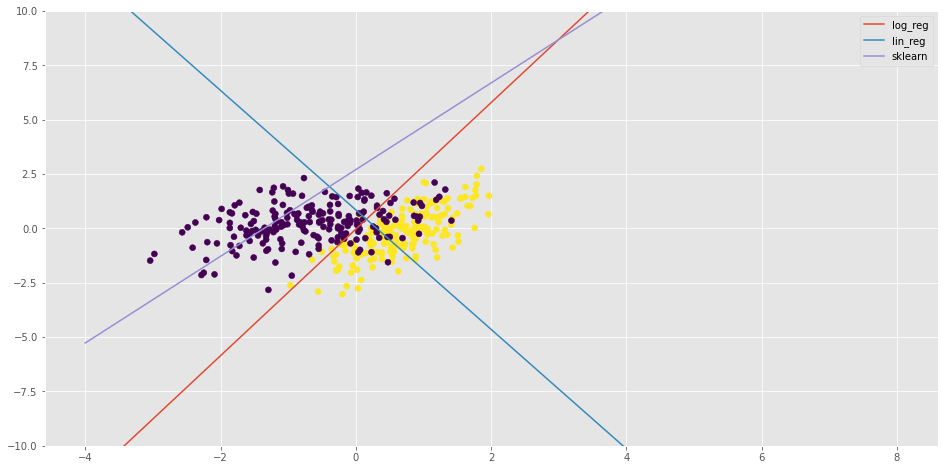

In [10]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # new!

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylim(-10, 10)

log_clf = MySGDClassifier(batch_generator, model_type='log_reg',
                          alpha=0.005, max_epoch=50)
log_clf.fit(X, y, batch_size=4, verbose=0)
plot_decision_boundary(log_clf)
print('Log loss: ',
      log_clf.calc_loss(np.hstack((np.ones((X.shape[0], 1)), X)), y), '\n')

lin_clf = MySGDClassifier(batch_generator, model_type='lin_reg',
                          alpha=0.001, max_epoch=100, C=10000)
lin_clf.fit(X, y, batch_size=32, verbose=0)
plot_decision_boundary(lin_clf)
print('Lin Loss: ',
      lin_clf.calc_loss(np.hstack((np.ones((X.shape[0], 1)), X)), y), '\n')

model = LinearRegression().fit(X, y)
w0, w1, w2 = model.intercept_, *model.coef_[:2]
print(w0, w1, w2)
xx = np.linspace(-4, 8, 2)
yy = -(w0 + w1 * xx) / w2
plt.plot(xx, yy, label='sklearn')

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [11]:
from sklearn.datasets import make_classification

In [12]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

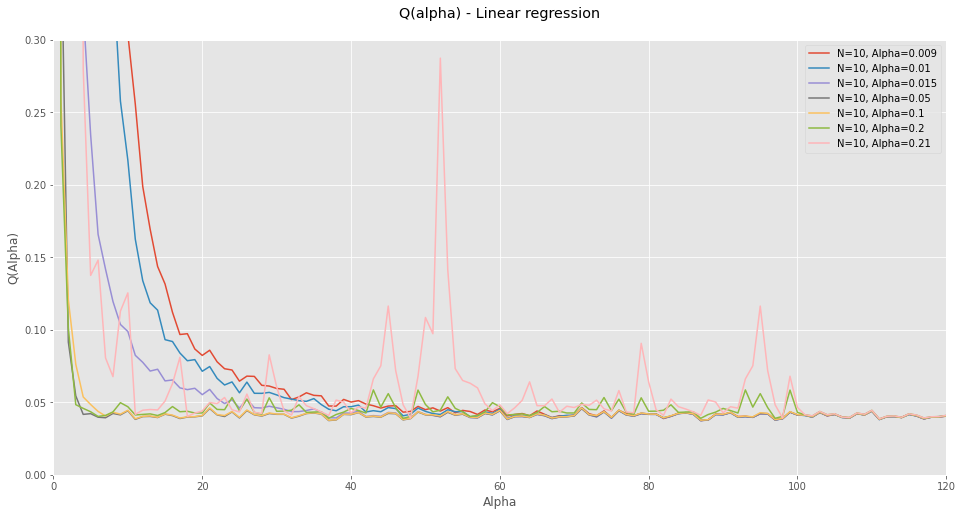

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylim(0, 0.3)
ax.set_xlim(0, 120)
check = 100000000000000

for alp in [0.009, 0.01, 0.015, 0.05, 0.1, 0.2, 0.21]:
    lin_clf = MySGDClassifier(batch_generator, model_type='lin_reg',
                              alpha=alp, C=1000, log_step=10)
    lin_clf.fit(X, y, batch_size=200, verbose=0)
    yc = np.array([])
    for i in range(0, len(lin_clf.errors_log['loss']), lin_clf.log_step):
        sm = sum(lin_clf.errors_log['loss'][i : min(i + lin_clf.log_step, len(lin_clf.errors_log['loss']))])
        n = min(i + lin_clf.log_step, len(lin_clf.errors_log['loss'])) - i
        yc = np.append(yc, sm / n)
    xc = np.arange(yc.shape[0])
    ax.plot(xc, yc, label='N={}, Alpha={}'.format(lin_clf.log_step, lin_clf.alpha))
    
ax.set_title('Q(alpha) - Linear regression\n')
plt.xlabel('Alpha')
plt.ylabel('Q(Alpha)')
plt.legend()

Из графика можно заметить, что чем больше значение $\alpha$, тем менее стабильна функция потерь. Оптимальными значениями параметра являются значения в районе $0.009-0.1$, и чем больше это значение, тем выше скорость сходимости и тем больше вероятность того, что регрессия будет расходиться. Будем использовать $\alpha=0.05$

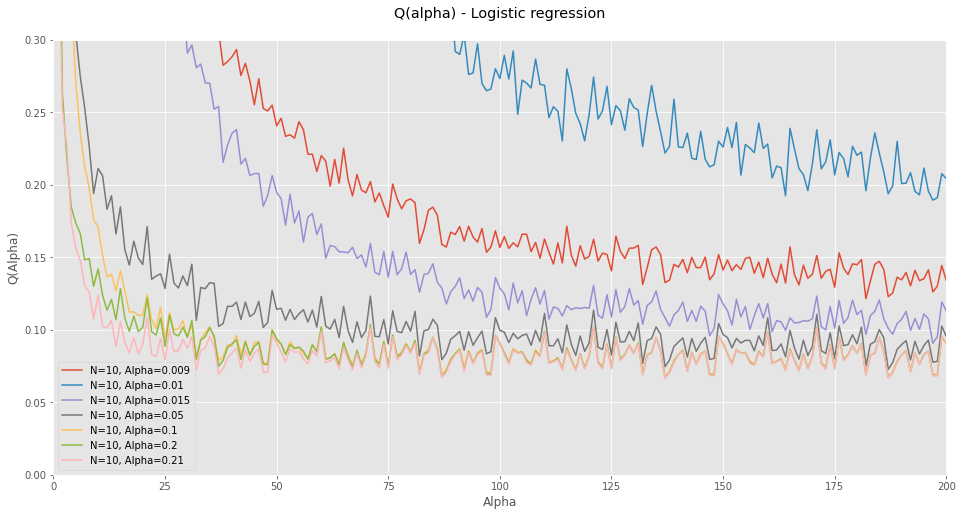

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylim(0, 0.3)
ax.set_xlim(0, 200)
for alp in [0.009, 0.01, 0.015, 0.05, 0.1, 0.2, 0.21]:
    lin_clf = MySGDClassifier(batch_generator, model_type='log_reg',
                              alpha=alp, C=1000, log_step=10)
    lin_clf.fit(X, y, batch_size=200, verbose=0)
    yc = np.array([])
    for i in range(0, len(lin_clf.errors_log['loss']), lin_clf.log_step):
        sm = sum(lin_clf.errors_log['loss'][i : min(i + lin_clf.log_step, len(lin_clf.errors_log['loss']))])
        n = min(i + lin_clf.log_step, len(lin_clf.errors_log['loss'])) - i
        yc = np.append(yc, sm / n)
    xc = np.arange(yc.shape[0])
    ax.plot(xc, yc, label='N={}, Alpha={}'.format(lin_clf.log_step, lin_clf.alpha))
    
ax.set_title('Q(alpha) - Logistic regression\n')
plt.xlabel('Alpha')
plt.ylabel('Q(Alpha)')
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

В данном случае стоит смотреть в сторону $0.05-0.1$. Выберем значение $alpha=0.05$.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

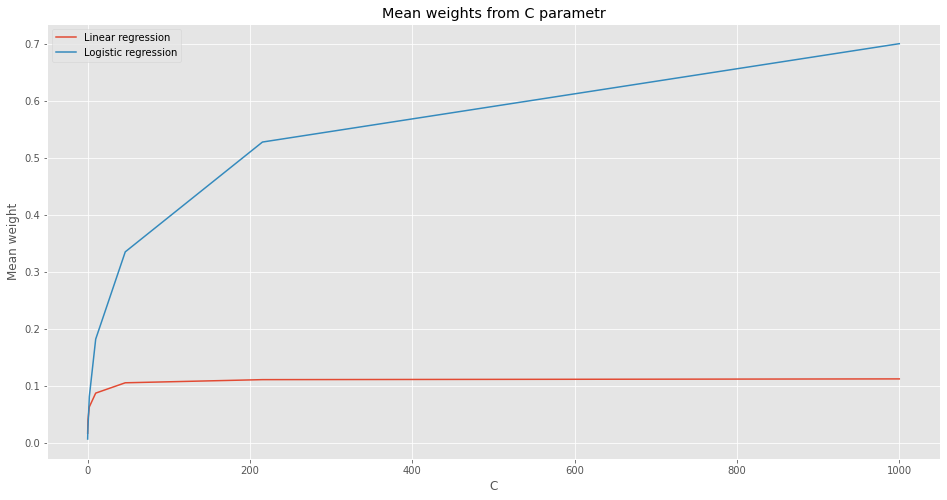

In [15]:
olderr = np.seterr(all='ignore')
lin_w = np.array([])
log_w = np.array([])
xc = np.logspace(3, -3, 10)
for c in xc:
    lin_clf = MySGDClassifier(batch_generator, model_type='lin_reg',
                              alpha=0.05, C=c, log_step=100)
    lin_clf.fit(X, y, batch_size=200)
    lin_w = np.append(lin_w, np.mean(np.absolute(lin_clf.weights)))

    log_clf = MySGDClassifier(batch_generator, model_type='log_reg',
                              alpha=0.05, C=c, log_step=100)
    log_clf.fit(X, y, batch_size=200)
    log_w = np.append(log_w, np.mean(np.absolute(log_clf.weights)))

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(xc, lin_w, label='Linear regression')
ax.plot(xc, log_w, label='Logistic regression')

ax.set_title('Mean weights from C parametr')
plt.xlabel('C')
plt.ylabel('Mean weight')
plt.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [16]:
doc_to_title = {}
with open('hw2_data/docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print(len(doc_to_title))

28026


In [17]:
import pandas as pd
train_data = pd.read_csv('hw2_data/train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [18]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [19]:
from sklearn.metrics import f1_score, make_scorer 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, cross_val_score

In [20]:
X_train0 = np.copy(X_train)

Нормализация по всей выборке:

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [22]:
lin_clf = MySGDClassifier(batch_generator, C=1, alpha=0.05, max_epoch=10, model_type='lin_reg')
%time lin_clf.fit(X_train, y_train, batch_size=32)

CPU times: user 363 ms, sys: 8.25 ms, total: 371 ms
Wall time: 484 ms


MySGDClassifier(alpha=0.05,
                batch_generator=<function batch_generator at 0x7fedc452c160>)

In [23]:
log_clf = MySGDClassifier(batch_generator, C=1, alpha=0.05, max_epoch=10, model_type='log_reg')
%time log_clf.fit(X_train, y_train, batch_size=4)

CPU times: user 3.52 s, sys: 62.5 ms, total: 3.59 s
Wall time: 4.94 s


MySGDClassifier(alpha=0.05,
                batch_generator=<function batch_generator at 0x7fedc452c160>,
                model_type='log_reg')

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [24]:
n_groups = 129
group_kfold = GroupKFold(n_splits=n_groups)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании. Как тогда правильно подобрать порог?

Подберем параметры моделей.

Порог для линейной модели:

Max: 0.4039076507168078
Threshold: 0.16666666666666666


[]

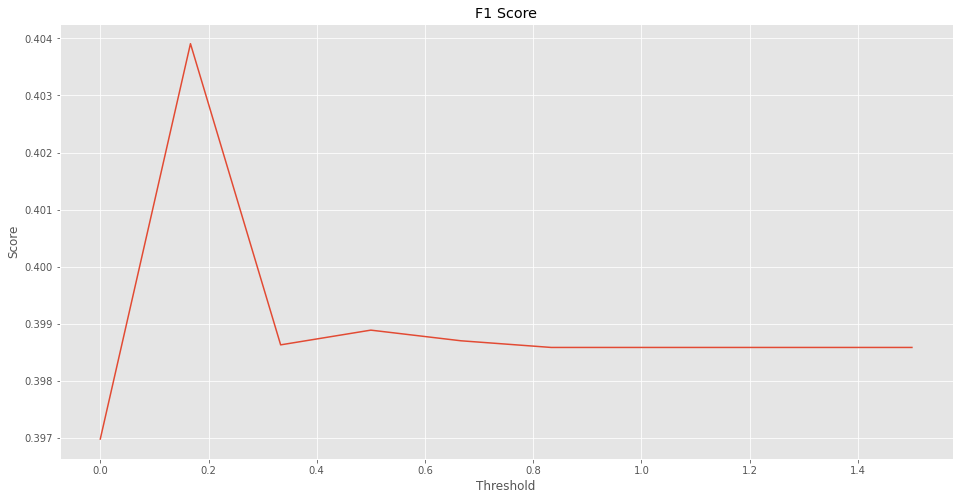

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')

xc = np.linspace(0, 1.5, 10)
res = np.array([])
scaler = StandardScaler()
for thres in xc:
    scores = np.array([])
    for train_index, test_index in group_kfold.split(X_train0,
                                                     y_train,
                                                     groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        lin_clf.fit(X_val_train, y_val_train, batch_size=256)
        y_pred = lin_clf.predict(X_val_test, thres)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    res = np.append(res, np.mean(scores))

print('Max: {}\nThreshold: {}'.format(np.max(res), xc[np.argmax(res)]))

ax.plot(xc, res)
plt.plot()

Порог для логистической регресии:

Max: 0.4052095335495095
Threshold: 0.32


[]

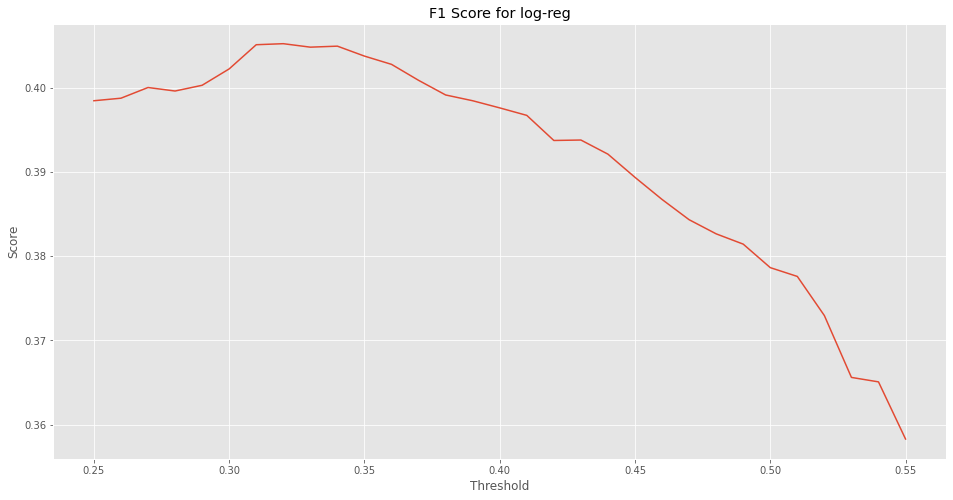

In [26]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('F1 Score for log-reg')
plt.xlabel('Threshold')
plt.ylabel('Score')

xc = np.linspace(0.25, 0.55, 31)
res = np.array([])
scaler = StandardScaler()
for thres in xc:
    scores = np.array([])
    for train_index, test_index in group_kfold.split(X_train0,
                                                     y_train,
                                                     groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        log_clf.fit(X_val_train, y_val_train, batch_size=256)
        y_pred = log_clf.predict(X_val_test, thres)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    res = np.append(res, np.mean(scores))

print('Max: {}\nThreshold: {}'.format(np.max(res), xc[np.argmax(res)]))

ax.plot(xc, res)
plt.plot()

Уточним порог для логистической регресии:

Max: 0.40567101626009605
Threshold: 0.3357142857142857


[]

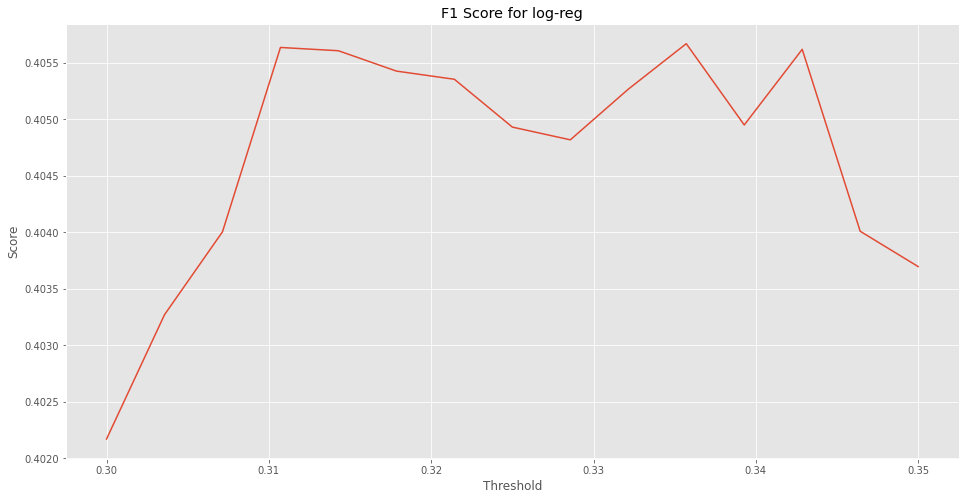

In [27]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('F1 Score for log-reg')
plt.xlabel('Threshold')
plt.ylabel('Score')

log_clf = MySGDClassifier(batch_generator, C=1.0346938775510204, alpha=0.05, max_epoch=50, model_type='log_reg')

xc = np.linspace(0.30, 0.35, 15)
res = np.array([])
scaler = StandardScaler() 
for thres in xc:
    scores = np.array([])
    for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        log_clf.fit(X_val_train, y_val_train, batch_size=256)
        y_pred = log_clf.predict(X_val_test, thres)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    res = np.append(res, np.mean(scores))
    

print('Max: {}\nThreshold: {}'.format(np.max(res), xc[np.argmax(res)]))

ax.plot(xc, res)
plt.plot()

Проведём кросс-валидацию для логистической регресии:

In [28]:
log_clf = MySGDClassifier(batch_generator, C=1.0346938775510204, alpha=0.05, max_epoch=50, model_type='log_reg')

res = np.array([])
scaler = StandardScaler() 
thres = 0.313
scores = np.array([])
for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
    X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
    X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
    X_val_train = scaler.fit_transform(X_val_train)
    X_val_test = scaler.fit_transform(X_val_test)
    log_clf.fit(X_val_train, y_val_train, batch_size=256)
    y_pred = log_clf.predict(X_val_test, thres)
    scores = np.append(scores, f1_score(y_val_test, y_pred))
    
print(np.mean(scores))

0.4060157248539064


Подберем размер батча.

In [29]:
scaler = StandardScaler()
scores = np.array([])
for bs in [128, 256, 512]:
    for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        log_clf.fit(X_val_train, y_val_train, batch_size=bs)
        y_pred = log_clf.predict(X_val_test, 0.32)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    print('BS: {}\tMin: {}\tMax: {}\tMean: {}\n'.format(bs, np.min(scores), np.max(scores), np.mean(scores)))

BS: 128	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4052628687810727

BS: 256	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4053110537935814

BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4053212874938025



Подберем константу С модели:

cn: 1.0	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.0714285714285714	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.1428571428571428	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.2142857142857142	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.2857142857142856	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.3571428571428572	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.4285714285714286	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.5	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.5714285714285714	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.6428571428571428	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.7142857142857142	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.7857142857142856	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.8571428571428572	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 1.9285714285714284	Min: 0.0	Max: 0.0	Mean: 0.0

cn: 2.0	Min: 0.0	Max: 0.0	Mean: 0.0



[]

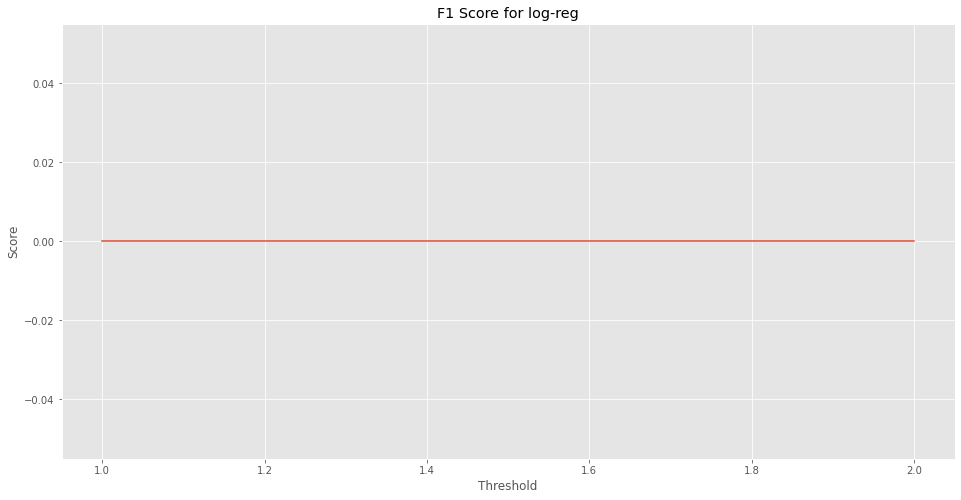

In [30]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('F1 Score for log-reg')
plt.xlabel('Threshold')
plt.ylabel('Score')

xc = np.linspace(1, 2, 15)
res = np.array([])
scaler = StandardScaler() 

scores = np.array([])
for cn in xc:
    for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        log_clf = MySGDClassifier(batch_generator, C=cn, alpha=0.05, max_epoch=10, model_type='log_reg')
        log_clf.fit(X_val_train, y_val_train, batch_size=256)
        y_pred = log_clf.predict(X_val_test, 1.0346938775510204)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    res = np.append(res, np.mean(scores))
    print('cn: {}\tMin: {}\tMax: {}\tMean: {}\n'.format(cn, np.min(scores), np.max(scores), np.mean(scores)))

ax.plot(xc, res)
plt.plot()

Зафиксируем оптимальные параметры:

In [31]:
lin_threshold = 0.15306122448979592
log_threshold = 0.313
log_c = 1.0346938775510204
batch_size = 256

Посмотрим, как меняется результат при измемении числа эпох:

In [32]:
scaler = StandardScaler()
scores = np.array([])
for ep in [10, 15, 20]:
    for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        log_clf = MySGDClassifier(batch_generator, C=1, alpha=0.05, max_epoch=ep, model_type='log_reg')
        log_clf.fit(X_val_train, y_val_train, batch_size=batch_size)
        y_pred = log_clf.predict(X_val_test, log_threshold)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    print('BS: {}\tMin: {}\tMax: {}\tMean: {}\n'.format(bs, np.min(scores), np.max(scores), np.mean(scores)))

BS: 512	Min: 0.07547169811320754	Max: 0.9540229885057472	Mean: 0.40609923804507597

BS: 512	Min: 0.07547169811320754	Max: 0.9600000000000001	Mean: 0.4060052105979816

BS: 512	Min: 0.07547169811320754	Max: 0.9600000000000001	Mean: 0.4059567363091398



С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [33]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train)

log_clf = MySGDClassifier(batch_generator, C=log_c, alpha=0.01, max_epoch=100, model_type='log_reg')
log_clf.fit(X_train_res, y_train, batch_size=1)

MySGDClassifier(C=1.0346938775510204,
                batch_generator=<function batch_generator at 0x7fedc452c160>,
                max_epoch=100, model_type='log_reg')

In [34]:
train_data = pd.read_csv('hw2_data/test_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [35]:
X_test = []
groups_train = []

for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target) in enumerate(docs):
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
        
X_test = np.array(X_test)
groups_train = np.array(groups_train)

In [36]:
import csv

scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

target = log_clf.predict(X_test, threshold=0.51)

with open('hw2_data/submission.csv', 'w') as f:
    fields = ['pair_id', 'target']
    writer = csv.DictWriter(f, fieldnames=fields)
    writer.writeheader()
    pi = 11691
    for elem in target:
        writer.writerow({'pair_id': str(pi), 'target': str(elem)})
        pi += 1
        
f.close()

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

Непонятным осталось поведение линейной регрессии при классификации, не очень понятно каким образом подбирать пороги для моделей. Каким образом проводить стандартизацию на валидации. 

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

На лекциях было ощущение, что всё понятно, но по-настоящему понятно стало только после практики, так что домашнее задание очень полезное(особенно теоретические вопросы). Можно даже делать еще больше теоретических вопросов, тогда всё, наверное, станет еще понятнее :)